In [16]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import batman



In [5]:
# Import data

data = np.load('/data/jpr64/rebinned_data_test.npy', allow_pickle = True)

In [80]:
# Importing a real rebinned lightcurves time
index = 4607
time = data[index][:,0]

time_start = time[0]
bins = np.size(time)


In [106]:

# Use batman to create transits
ma = batman.TransitParams()
ma.t0 = time_start  # time of inferior conjunction; first transit is X days after start
ma.per = 2  # orbital period
ma.rp = 0.1  # 6371 planet radius (in units of stellar radii)
ma.a = 15 # semi-major axis (in units of stellar radii)
ma.inc = 90  # orbital inclination (in degrees)
ma.ecc = 0  # eccentricity
ma.w = 90  # longitude of periastron (in degrees)
ma.u = []  # limb darkening coefficients
ma.limb_dark = "uniform"  # limb darkening model
m = batman.TransitModel(ma, time)  # initializes model
synthetic_signal = m.light_curve(ma)  # calculates light curve

# Create noise and merge with flux

noise_mean_ratio = 0.005
noise = np.random.normal(0, noise_mean_ratio, bins)
y = synthetic_signal + noise


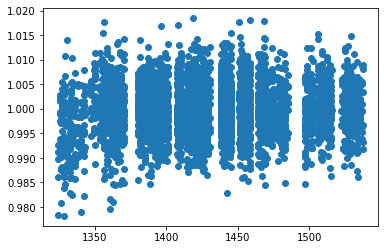

In [107]:
plt.scatter(time, y)

In [108]:
from transitleastsquares import transitleastsquares
model = transitleastsquares(time, y)
results = model.power(period_min = 1, period_max = 12, u = [0], limb_dark = "linear")





/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/transitleastsquares/transit.py:157: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lc_arr = numpy.array(lc_arr)
  0%|          | 0/14256 periods | 00:00<?

Transit Least Squares TLS 1.0.26 (20 March 2021)
Creating model cache for 37 durations
Searching 4632 data points, 14256 periods from 1.0 to 12.0 days
Using all 64 CPU threads


100%|██████████| 14256/14256 periods | 00:30<00:00
/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/transitleastsquares/main.py:404: UserWarning: 94 of 106 transits without data. The true period may be twice the given period.
  warnings.warn(text)


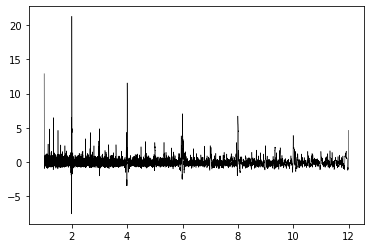

In [109]:
plt.plot(results.periods, results.power, color='black', lw=0.5)


In [110]:
print('Period', format(results.period, '.5f'), 'd')
print(len(results.transit_times), 'transit times in time series:', \
        ['{0:0.5f}'.format(i) for i in results.transit_times])
print('Transit depth', format(results.depth, '.5f'))
print('Best duration (days)', format(results.duration, '.5f'))
print('Signal detection efficiency (SDE):', results.SDE)

Period 1.99990 d
106 transit times in time series: ['1326.39588', '1328.39578', '1330.39568', '1332.39557', '1334.39547', '1336.39537', '1338.39526', '1340.39516', '1342.39506', '1344.39495', '1346.39485', '1348.39475', '1350.39464', '1352.39454', '1354.39444', '1356.39433', '1358.39423', '1360.39413', '1362.39402', '1364.39392', '1366.39382', '1368.39372', '1370.39361', '1372.39351', '1374.39341', '1376.39330', '1378.39320', '1380.39310', '1382.39299', '1384.39289', '1386.39279', '1388.39268', '1390.39258', '1392.39248', '1394.39237', '1396.39227', '1398.39217', '1400.39206', '1402.39196', '1404.39186', '1406.39175', '1408.39165', '1410.39155', '1412.39145', '1414.39134', '1416.39124', '1418.39114', '1420.39103', '1422.39093', '1424.39083', '1426.39072', '1428.39062', '1430.39052', '1432.39041', '1434.39031', '1436.39021', '1438.39010', '1440.39000', '1442.38990', '1444.38979', '1446.38969', '1448.38959', '1450.38948', '1452.38938', '1454.38928', '1456.38918', '1458.38907', '1460.3889

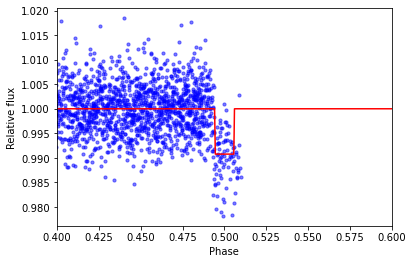

In [111]:
plt.figure()
plt.plot(results.model_folded_phase, results.model_folded_model, color='red')
plt.scatter(results.folded_phase, results.folded_y, color='blue', s=10, alpha=0.5, zorder=2)
plt.xlim(0.4, 0.6)
plt.ticklabel_format(useOffset=False)
plt.xlabel('Phase')
plt.ylabel('Relative flux');